#### Ten real-valued features are computed for each cell nucleus:

1. `radius` - (mean of distances from center to points on the perimeter)
2. `texture`- (standard deviation of gray-scale values)
3. `perimeter`
4. `area`
5. `smoothness` - (local variation in radius lengths)
6. `compactness` - (perimeter^2 / area - 1.0)
7. `concavity` - (severity of concave portions of the contour)
8. `concave points` - (number of concave portions of the contour)
9. `symmetry`
10. `fractal dimension` - ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

#upsampling
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter

import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
df = pd.read_csv('./data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

It looks like there is an input error in the `Unnamed: 32` where all the data is not available. Hence we can drop this column.

In [5]:
#counting duplicate 
df.duplicated().sum()

0

In [6]:
len(df.id.unique())

569

We can notice that all the `id` are unique and the number of `id` are equal to the number of rows .i.e there is no duplicacy in the data. Let us drop the id's column.

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df.drop(columns = ["id", "Unnamed: 32"], inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


37% of the total data belong to Malignant Class and almost 63% belong to Benign class. We can balance this data using Upsampling.

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()

array([1, 0], dtype=int64)

Benign: 62.74%
Malignant: 37.26%



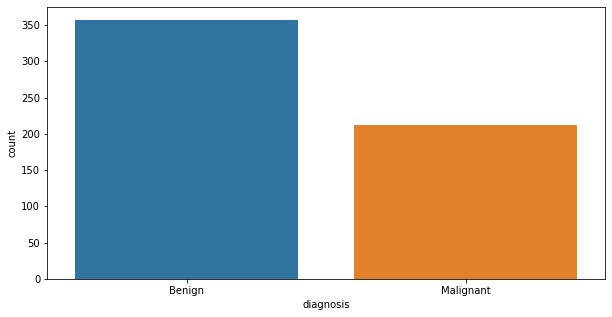

In [12]:
B, M = df["diagnosis"].value_counts()
benign = (B/(B + M))*100
malignant = (M/(B + M))*100

print(f"Benign: {benign:.2f}%")
print(f"Malignant: {malignant:.2f}%")

print()
plt.figure(figsize=(10,5))
g = sns.countplot(df['diagnosis'])
g.set_xticklabels(['Benign','Malignant'])
plt.show()

In [13]:
def plot_compare(mydata,col_target,col_x):
    d1=mydata[mydata[col_target]==1][col_x]
    d2=mydata[mydata[col_target]==0][col_x]
    plt.figure(figsize=(7.5,7.5))
    sns.distplot(d1,label='Malignant')
    sns.distplot(d2,label='Benign')
    plt.legend(loc='upper left')

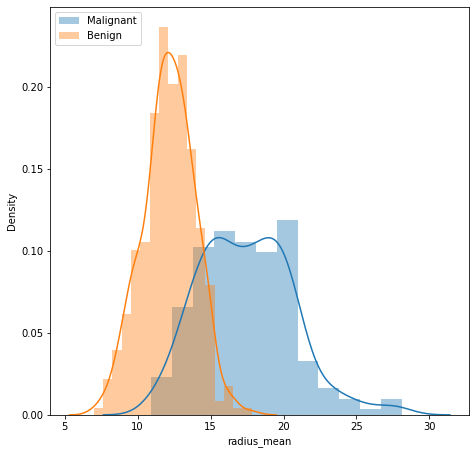

In [14]:
plot_compare(df, 'diagnosis', 'radius_mean')

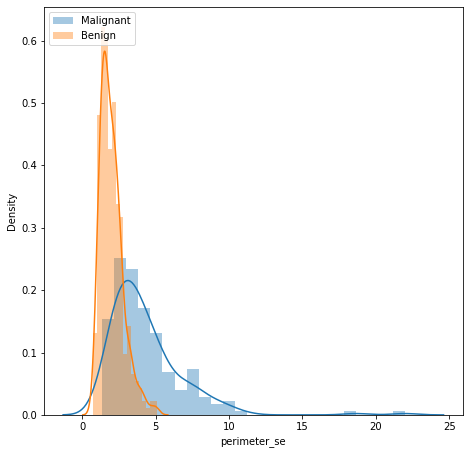

In [15]:
plot_compare(df, 'diagnosis', 'perimeter_se')

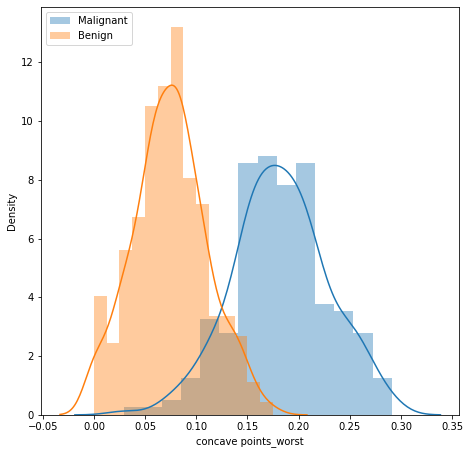

In [16]:
plot_compare(df, 'diagnosis', 'concave points_worst')

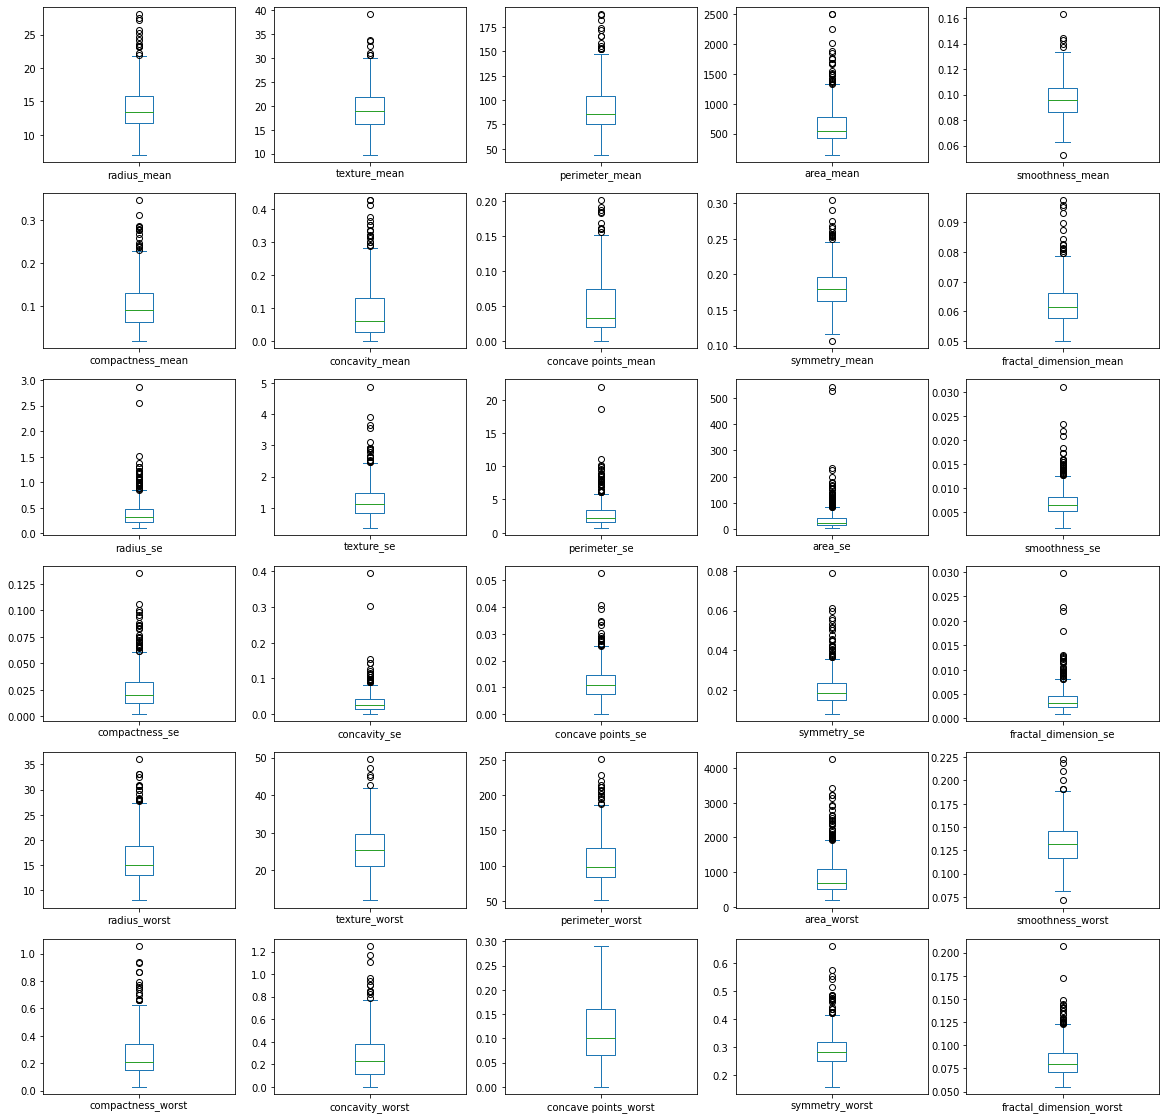

In [17]:
df.drop(['diagnosis'], axis = 1).plot(kind='box', subplots = True, layout = (6,5), figsize = (20,20))
plt.show()

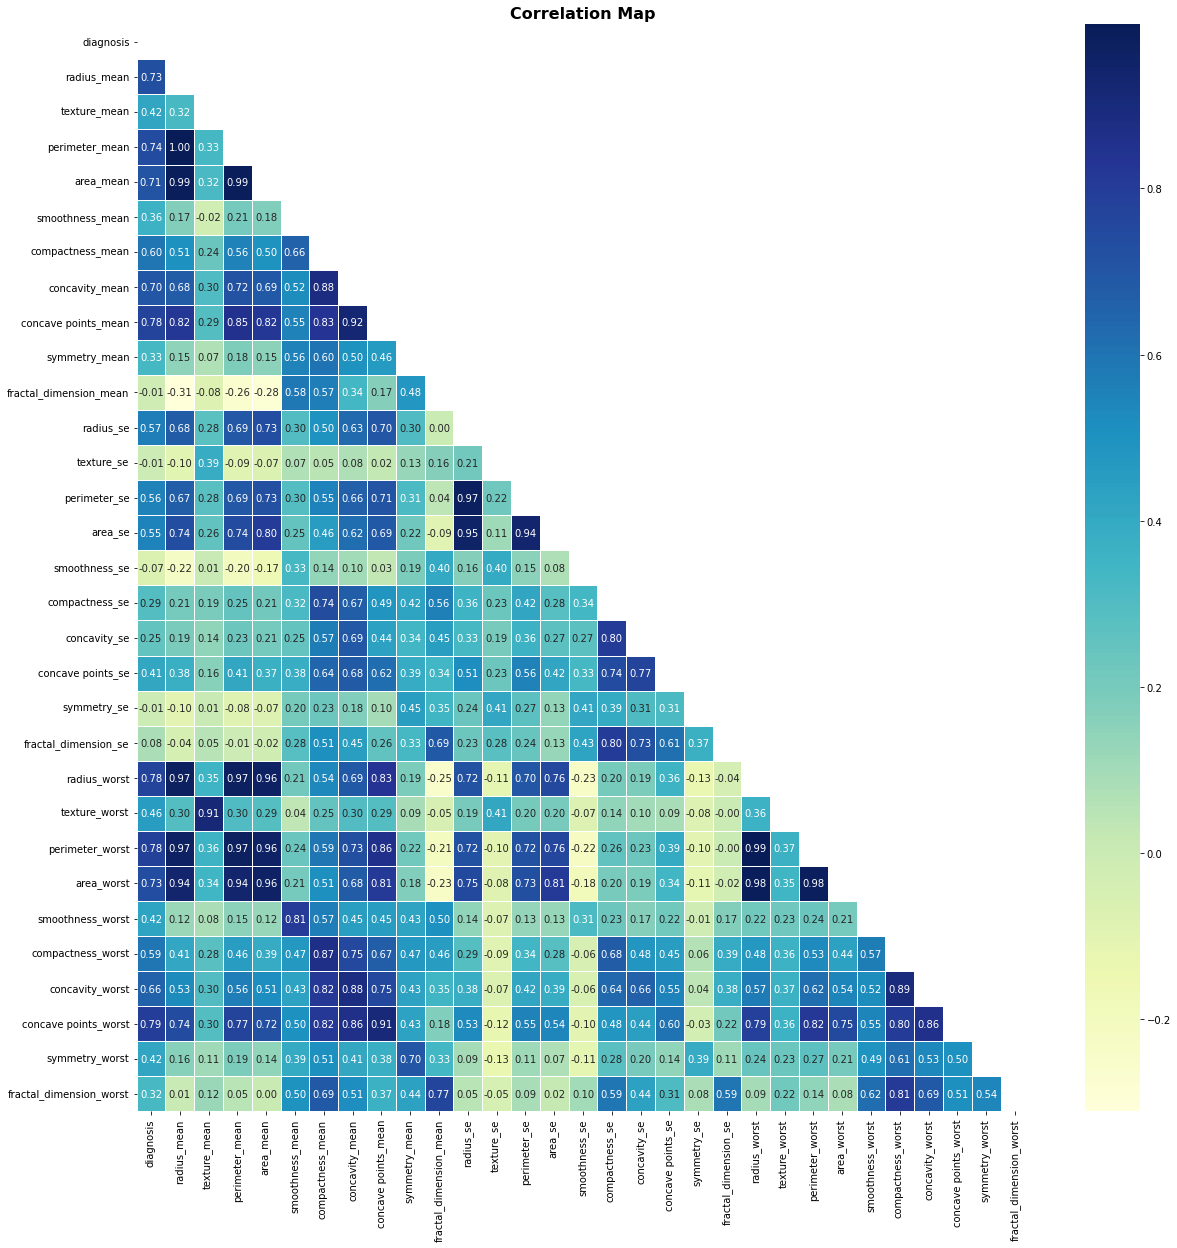

In [18]:
df_corr = df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_corr, mask=mask, linewidths=1, cmap='YlGnBu', annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Correlation Map", fontweight = "bold", fontsize=16)
plt.show()

In [19]:
data_vars = df.columns.values.tolist()
y = ['diagnosis']
x = [i for i in data_vars if i not in y]

In [20]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(df[x], df[y], test_size=0.3, random_state=16)

In [21]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=16, n_jobs=-1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('f1 score: ', f1_score(y_test, y_pred))

In [22]:
for index in range(1,31):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=16), n_features_to_select=index)
    sel.fit(X_train, y_train)
    X_train_rfe = sel.transform(X_train)
    X_test_rfe = sel.transform(X_test)
    print('Selected feature: ',index)
    run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Selected feature:  1
f1 score:  0.8387096774193548
Selected feature:  2
f1 score:  0.9302325581395349
Selected feature:  3
f1 score:  0.9160305343511451
Selected feature:  4
f1 score:  0.9302325581395349
Selected feature:  5
f1 score:  0.9160305343511451
Selected feature:  6
f1 score:  0.9160305343511451
Selected feature:  7
f1 score:  0.9384615384615385
Selected feature:  8
f1 score:  0.9384615384615385
Selected feature:  9
f1 score:  0.9312977099236641
Selected feature:  10
f1 score:  0.9692307692307692
Selected feature:  11
f1 score:  0.9545454545454547
Selected feature:  12
f1 score:  0.9618320610687022
Selected feature:  13
f1 score:  0.9618320610687022
Selected feature:  14
f1 score:  0.9538461538461539
Selected feature:  15
f1 score:  0.9692307692307692
Selected feature:  16
f1 score:  0.9692307692307692
Selected feature:  17
f1 score:  0.9612403100775193
Selected feature:  18
f1 score:  0.9538461538461539
Selected feature:  19
f1 score:  0.9538461538461539
Selected feature:  20

Since 10,15,16,and 22 have the highest f1_score, i just choose 10 to save processing time

In [23]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=16, n_jobs=-1), n_features_to_select=10)
sel.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=16),
    n_features_to_select=10)

In [24]:
features = X_train.columns[sel.get_support()]
features

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

In [25]:
df_clear = df[['radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst','diagnosis']]
df_clear

,radius_mean,perimeter_mean,area_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.0,0.14710,25.380,17.33,184.60,2019.0,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.07017,24.990,23.41,158.80,1956.0,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.12790,23.570,25.53,152.50,1709.0,0.4504,0.2430,1
3,11.42,77.58,386.1,0.10520,14.910,26.50,98.87,567.7,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.10430,22.540,16.67,152.20,1575.0,0.4000,0.1625,1
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.13890,25.450,26.40,166.10,2027.0,0.4107,0.2216,1
565,20.13,131.20,1261.0,0.09791,23.690,38.25,155.00,1731.0,0.3215,0.1628,1
566,16.60,108.30,858.1,0.05302,18.980,34.12,126.70,1124.0,0.3403,0.1418,1
567,20.60,140.10,1265.0,0.15200,25.740,39.42,184.60,1821.0,0.9387,0.2650,1


In [26]:
def threshold(z,d):
    for i in np.arange(3,5,0.1):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df_clear))
threshold(z,df_clear)

With threshold 3.0 data loss is 4.04%
With threshold 3.1 data loss is 3.51%
With threshold 3.2 data loss is 3.16%
With threshold 3.3 data loss is 2.99%
With threshold 3.4 data loss is 2.64%
With threshold 3.5 data loss is 2.28%
With threshold 3.6 data loss is 2.11%
With threshold 3.7 data loss is 1.93%
With threshold 3.8 data loss is 1.93%
With threshold 3.9 data loss is 1.76%
With threshold 4.0 data loss is 1.23%
With threshold 4.1 data loss is 1.23%
With threshold 4.2 data loss is 1.05%
With threshold 4.3 data loss is 1.05%
With threshold 4.4 data loss is 0.88%
With threshold 4.5 data loss is 0.7%
With threshold 4.6 data loss is 0.53%
With threshold 4.7 data loss is 0.53%
With threshold 4.8 data loss is 0.35%
With threshold 4.9 data loss is 0.35%


In [28]:
df_clear2=df_clear[(z<3.0).all(axis=1)]

In [29]:
df_clear2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   radius_mean           546 non-null    float64
 1   perimeter_mean        546 non-null    float64
 2   area_mean             546 non-null    float64
 3   concave points_mean   546 non-null    float64
 4   radius_worst          546 non-null    float64
 5   texture_worst         546 non-null    float64
 6   perimeter_worst       546 non-null    float64
 7   area_worst            546 non-null    float64
 8   concavity_worst       546 non-null    float64
 9   concave points_worst  546 non-null    float64
 10  diagnosis             546 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 51.2 KB


In [30]:
X = df_clear2.drop('diagnosis', axis=1)
y = df_clear2.diagnosis

In [31]:
# split data train 80 % and test 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [32]:
#using SMOTE from imblearn
counter = Counter(y_train)
counter

Counter({0: 287, 1: 149})

In [33]:
upsample = SMOTE()
X_train, y_train = upsample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 287, 1: 287})


In [34]:
print(f"Total Data after Upsampling: {len(X_train)}")

Total Data after Upsampling: 574


In [35]:
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (574, 10), (574,)
Test Data: (110, 10), (110,)


In [36]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print('RANDOM FOREST TRAINING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\n RANDOM FOREST TESTING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

RANDOM FOREST TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574

Confussion Matrix ------------------------------------
[[287   0]
 [  0 287]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.9727272727272728
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.95      0.98      0.96        41

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110

Confussion Matrix ---------------------------------

In [37]:
def evaluation_train(clf):
  y_train_pred=clf.predict(X_train)
  cm_train=confusion_matrix(y_train, y_train_pred)

  plt.figure(figsize=(6,6))
  sns.heatmap(cm_train,annot=True,fmt=',.0f',linewidths=3, annot_kws={"fontsize":16})

  print(classification_report(y_train,y_train_pred))

In [38]:
def evaluation_test(clf):
  y_test_pred=clf.predict(X_test)
  cm_test=confusion_matrix(y_test, y_test_pred)

  plt.figure(figsize=(6,6))
  sns.heatmap(cm_test,annot=True,fmt=',.0f',linewidths=3, annot_kws={"fontsize":16})

  print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



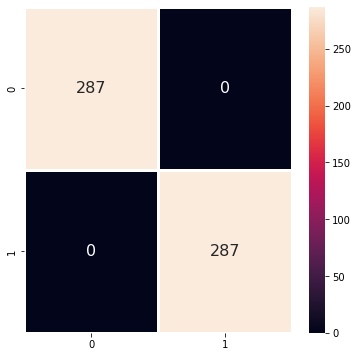

In [39]:
evaluation_train(rf_clf)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.95      0.98      0.96        41

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



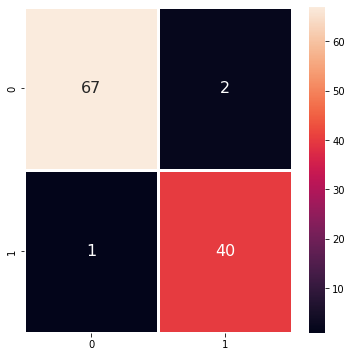

In [40]:
evaluation_test(rf_clf)

Hyperparameter Tuning: Randomforest

In [41]:
parameters = {'n_estimators':[10,20,30,40],
              'max_depth':[5,6,7,8,9,10],
              'min_samples_split':[3,5,7,9,11],
              'max_leaf_nodes':[8,12,16,20]}
model_base=RandomForestClassifier(n_estimators=10,min_samples_split=3,min_samples_leaf=2,max_leaf_nodes=4)
clf_search1 = GridSearchCV(model_base, parameters, cv=5,verbose=1, n_jobs=-1)

In [42]:
L0=time.time()
clf_search1.fit(X_train,y_train)
print(time.time()-L0)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
80.11076807975769


In [43]:
# clf.cv_results_
clf_search1.best_estimator_

RandomForestClassifier(max_depth=5, max_leaf_nodes=20, min_samples_leaf=2,
                       min_samples_split=7, n_estimators=40)

In [44]:
clf_search1.best_score_

0.9686498855835242

In [45]:
y_pred = clf_search1.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        69
           1       0.98      0.98      0.98        41

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110



In [46]:
# Do not fit the scaler while standardizate X_test
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [47]:
svm_svc = svm.SVC(kernel='rbf', C=2, gamma='auto')
svm_svc.fit(X_train, y_train)
y_train_pred = svm_svc.predict(X_train)
y_test_pred = svm_svc.predict(X_test)

print('SVC TRAINING RESULT:')
print('======================================================')
print('Accuracy:', svm_svc.score(X_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\n SVC TESTING RESULT:')
print('======================================================')
print('Accuracy:', svm_svc.score(X_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

SVC TRAINING RESULT:
Accuracy: 0.9703832752613241
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       287
           1       0.98      0.96      0.97       287

    accuracy                           0.97       574
   macro avg       0.97      0.97      0.97       574
weighted avg       0.97      0.97      0.97       574

Confussion Matrix ------------------------------------
[[281   6]
 [ 11 276]]


 SVC TESTING RESULT:
Accuracy: 0.990909090909091
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      0.98      0.99        41

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110

Confussion Matrix ------------------------------------
[[

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       287
           1       0.98      0.96      0.97       287

    accuracy                           0.97       574
   macro avg       0.97      0.97      0.97       574
weighted avg       0.97      0.97      0.97       574



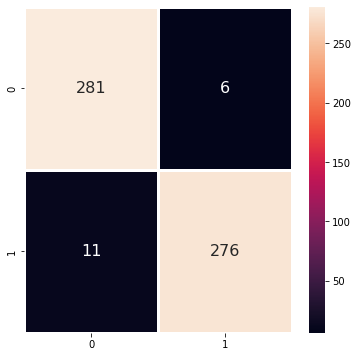

In [48]:
evaluation_train(svm_svc)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      0.98      0.99        41

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110



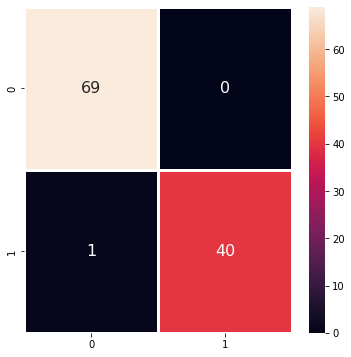

In [49]:
evaluation_test(svm_svc)

Hyperparameter Tuning: SVM

In [50]:
parameters = {'kernel':['linear','rbf'],
              'C':[1.5,1.6,1.7,1.8,1.9], 
              'gamma': [0.01,0.05,0.08]}
clf_search2 = GridSearchCV(svm.SVC(), parameters, refit=True,verbose=3)

In [51]:
L0=time.time()
clf_search2.fit(X_train,y_train)
print(time.time()-L0)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ..C=1.5, gamma=0.01, kernel=linear;, score=0.948 total time=   0.0s
[CV 2/5] END ..C=1.5, gamma=0.01, kernel=linear;, score=0.983 total time=   0.0s
[CV 3/5] END ..C=1.5, gamma=0.01, kernel=linear;, score=0.974 total time=   0.0s
[CV 4/5] END ..C=1.5, gamma=0.01, kernel=linear;, score=0.991 total time=   0.0s
[CV 5/5] END ..C=1.5, gamma=0.01, kernel=linear;, score=0.956 total time=   0.0s
[CV 1/5] END .....C=1.5, gamma=0.01, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END .....C=1.5, gamma=0.01, kernel=rbf;, score=0.965 total time=   0.0s
[CV 3/5] END .....C=1.5, gamma=0.01, kernel=rbf;, score=0.974 total time=   0.0s
[CV 4/5] END .....C=1.5, gamma=0.01, kernel=rbf;, score=0.991 total time=   0.0s
[CV 5/5] END .....C=1.5, gamma=0.01, kernel=rbf;, score=0.930 total time=   0.0s
[CV 1/5] END ..C=1.5, gamma=0.05, kernel=linear;, score=0.948 total time=   0.0s
[CV 2/5] END ..C=1.5, gamma=0.05, kernel=linear

In [52]:
# clf.cv_results_
clf_search2.best_estimator_

SVC(C=1.5, gamma=0.01, kernel='linear')

In [53]:
clf_search2.best_score_

0.9703585049580473

In [54]:
y_pred = clf_search2.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.95      0.98      0.96        41

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



In [55]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('KNN TRAINING RESULT:')
print('======================================================')
print('Accuracy:', knn.score(X_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\n KNN TESTING RESULT:')
print('======================================================')
print('Accuracy:', knn.score(X_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

KNN TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574

Confussion Matrix ------------------------------------
[[287   0]
 [  0 287]]


 KNN TESTING RESULT:
Accuracy: 0.9727272727272728
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.93      1.00      0.96        41

    accuracy                           0.97       110
   macro avg       0.97      0.98      0.97       110
weighted avg       0.97      0.97      0.97       110

Confussion Matrix ------------------------------------
[[66  3]
 [ 0 41

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574



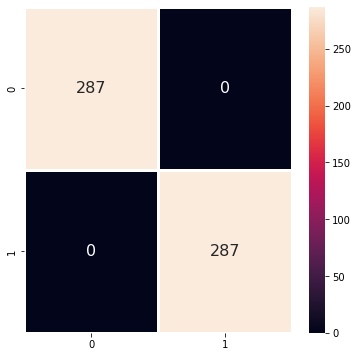

In [56]:
evaluation_train(knn)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.93      1.00      0.96        41

    accuracy                           0.97       110
   macro avg       0.97      0.98      0.97       110
weighted avg       0.97      0.97      0.97       110



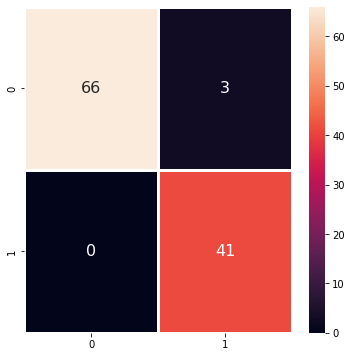

In [57]:
evaluation_test(knn)

Hyperparameter Tuning: KNN

In [66]:
parameters = {'n_neighbors':list(range(1,30)),
              'weights':["uniform",'distance'], 
              'metric':['euclidean','manhattan'], 
              'leaf_size':list(range(1,50)), 
              'p':[1,2]}

clf_search3 = GridSearchCV(KNeighborsClassifier(), parameters, cv=3, verbose=3, n_jobs=-1)

In [67]:
L0=time.time()
clf_search3.fit(X_train,y_train)
print(time.time()-L0)

Fitting 3 folds for each of 11368 candidates, totalling 34104 fits
214.9296360015869


In [68]:
# clf.cv_results_
clf_search3.best_estimator_

KNeighborsClassifier(leaf_size=1, metric='manhattan', p=1, weights='distance')

In [69]:
clf_search3.best_score_

0.97913030831879

In [70]:
y_pred = clf_search3.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.95      1.00      0.98        41

    accuracy                           0.98       110
   macro avg       0.98      0.99      0.98       110
weighted avg       0.98      0.98      0.98       110



In [73]:
knn_tuned = clf_search3.best_estimator_
knn_tuned.fit(X_train, y_train)
y_train_pred = knn_tuned.predict(X_train)
y_test_pred = knn_tuned.predict(X_test)

print('KNN TUNED TRAINING RESULT:')
print('======================================================')
print('Accuracy:', knn_tuned.score(X_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\n KNN TUNED TESTING RESULT:')
print('======================================================')
print('Accuracy:', knn_tuned.score(X_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

KNN TUNED TRAINING RESULT:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       287
           1       1.00      1.00      1.00       287

    accuracy                           1.00       574
   macro avg       1.00      1.00      1.00       574
weighted avg       1.00      1.00      1.00       574

Confussion Matrix ------------------------------------
[[287   0]
 [  0 287]]


 KNN TUNED TESTING RESULT:
Accuracy: 0.9818181818181818
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.95      1.00      0.98        41

    accuracy                           0.98       110
   macro avg       0.98      0.99      0.98       110
weighted avg       0.98      0.98      0.98       110

Confussion Matrix ------------------------------------
[[67

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        69
           1       0.95      1.00      0.98        41

    accuracy                           0.98       110
   macro avg       0.98      0.99      0.98       110
weighted avg       0.98      0.98      0.98       110



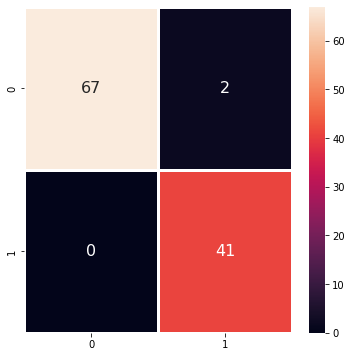

In [72]:
evaluation_test(knn_tuned)